In [45]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and prepare data
df = pd.read_csv("Downloads/724-000005.csv")
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d,%H:%M:%S')
df.set_index('Time', inplace=True)
df.rename(columns={
    'Vb [m3]': 'Uncorrected Volume',
    'Vbt [m3]': 'Total Uncorrected Volume',
    'Vm [m3]': 'Corrected Volume',
    'Vmt [m3]': 'Total Corrected Volume',
    'Diffrence': 'Diffrence',    
    'p.MP  [ bar]': 'Pressure (bar)',
    'T.MP [{C]': 'Temperature (C)'
}, inplace=True)

df['Hourly Usage'] = df['Diffrence']
df['Pressure (psig)'] = df['Pressure (bar)'] * 14.5038
march_data = df.loc['2025-01-01':'2025-04-14']


# Set approved pressure limit
approved_pressure_limit = 25.5  # in psig

# Set approved hourly load
approved_hourly_load = 530  # in CM

# Resample to daily data
daily_usage = march_data['Hourly Usage'].resample('D').sum()
daily_avg_pressure = march_data['Pressure (psig)'].resample('D').mean()

# Create a Word document
doc = Document()
doc.add_heading('Hourly Gas Usage and Pressure - Hafiza Traders Pvt. Ltd', level=1)

# Directory to save plots temporarily
plot_dir = "Downloads/PlotsData"
os.makedirs(plot_dir, exist_ok=True)



# Loop through each day and plot with fixed time axis
for date in march_data.index.normalize().unique():
    daily = march_data.loc[date.strftime('%Y-%m-%d')]
    
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.set_title(f"Hourly Gas Usage and Pressure (psig) - {date.strftime('%Y-%m-%d')}")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Gas Usage (m³)", color='blue')
    ax1.plot(daily.index, daily['Hourly Usage'], color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    
    # Daily gas usage bar
    #ax1.plot(daily_usage.index, daily_usage, color='skyblue', label='Daily Gas Usage (m³)')
    #ax1.set_ylabel('Gas Usage (m³)', color='blue')
    #ax1.tick_params(axis='y', labelcolor='blue')

    # Hourly gas usage line
    #ax1.plot(march.index, march['Hourly Usage'], color='Blue', label='Hourly Gas Usage (m³)')
    #ax1.set_ylabel('Hourly Gas Usage (m³)', color='Blue')
    #ax1.tick_params(axis='x', labelcolor='Blue')
    
    # Fix X-axis from 00:00 to 23:59
    ax1.set_xlim(pd.Timestamp(f"{date.date()} 00:00:00"), pd.Timestamp(f"{date.date()} 23:59:59"))

    # 🔶 Highlight Time Range Set
    highlight_start = pd.Timestamp(f"{date.date()} 14:00:00")
    highlight_end = pd.Timestamp(f"{date.date()} 21:00:00")
    ax1.axvspan(highlight_start, highlight_end, color='red', alpha=0.1)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Pressure (psig)", color='red')
    ax2.plot(daily.index, daily['Pressure (psig)'], color='red', alpha=1)
    ax2.tick_params(axis='y', labelcolor='red')

    # Create second y-axis for Approved pressure
    ax2.axhline(approved_pressure_limit, color='red', linestyle='-', label='Approved Pressure Limit')
    #ax2.set_ylabel('Pressure (psig)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Create second y-axis for Approve Load Line
    ax1.axhline(approved_hourly_load, color='Blue', linestyle='-', label='Approved Hourly Load')
    #ax1.set_ylabel('Hourly Load', color='purple')
    ax1.tick_params(axis='y', labelcolor='Blue')


    plt.grid(True)
    plt.tight_layout()
    plot_path = os.path.join(plot_dir, f"{date.strftime('%Y-%m-%d')}.png")
    plt.savefig(plot_path)
    plt.close()

    doc.add_heading(date.strftime('Daily and Hourly Data on : %Y-%m-%d'), level=2)
    
    doc.add_picture(plot_path, width=Inches(7))

# Save the document
doc_path = "Downloads/Hafiza-Tradrs-Pvt-Ltd_2025_Hourly_Report-.docx"
doc.save(doc_path)
doc_path



'Downloads/Hafiza-Tradrs-Pvt-Ltd_2025_Hourly_Report-.docx'

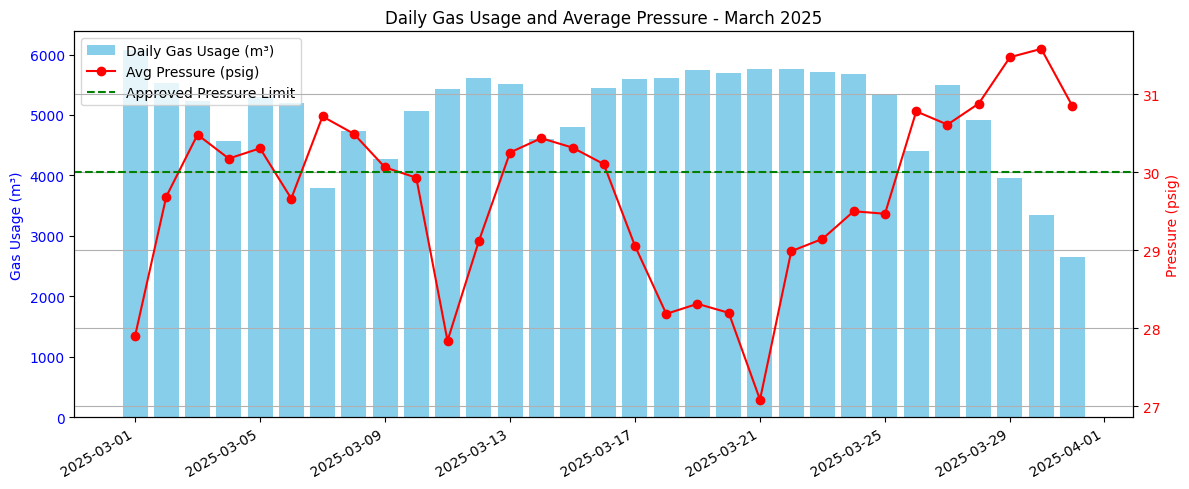

In [21]:
import matplotlib.pyplot as plt

# Set approved pressure limit
approved_pressure_limit = 30  # in psig

# Filter data for March 2025
march = df.loc['2025-03']

# Resample to daily data
daily_usage = march['Hourly Usage'].resample('D').sum()
daily_avg_pressure = march['Pressure (psig)'].resample('D').mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Daily gas usage bar
ax1.bar(daily_usage.index, daily_usage, color='skyblue', label='Daily Gas Usage (m³)')
ax1.set_ylabel('Gas Usage (m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for pressure
ax2 = ax1.twinx()
ax2.plot(daily_avg_pressure.index, daily_avg_pressure, color='red', label='Avg Pressure (psig)', marker='o')
ax2.axhline(approved_pressure_limit, color='green', linestyle='--', label='Approved Pressure Limit')
ax2.set_ylabel('Pressure (psig)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and labels
plt.title('Daily Gas Usage and Average Pressure - March 2025')
fig.autofmt_xdate()
fig.tight_layout()

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()



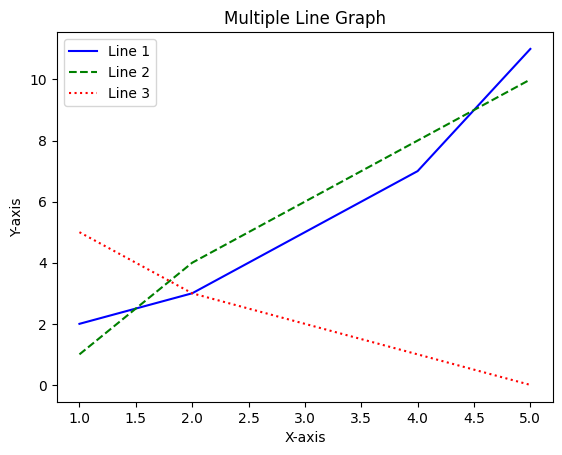

In [31]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]
y2 = [1, 4, 6, 8, 10]
y3 = [5, 3, 2, 1, 0]

# Create the plot
plt.plot(x, y1, label='Line 1', color='blue', linestyle='-')
plt.plot(x, y2, label='Line 2', color='green', linestyle='--')
plt.plot(x, y3, label='Line 3', color='red', linestyle=':')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Graph')

# Show legend
plt.legend()

# Display the plot
plt.show()


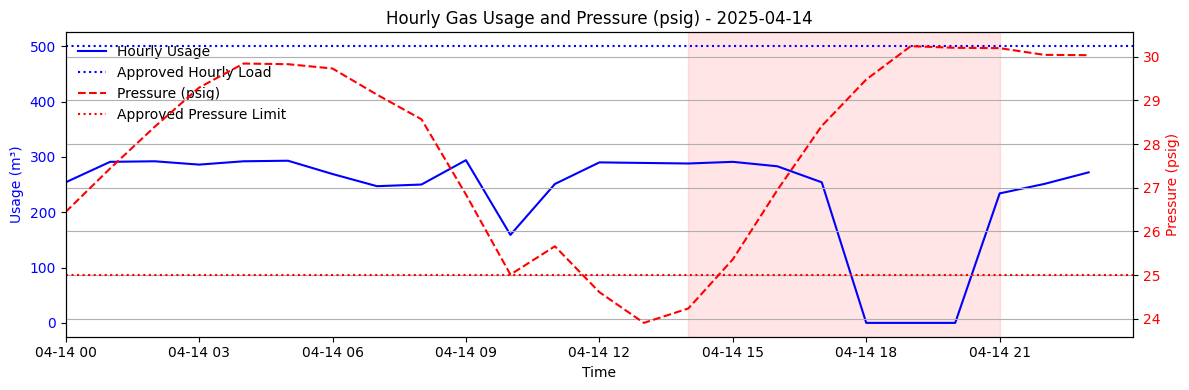

In [32]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.set_title(f"Hourly Gas Usage and Pressure (psig) - {date.strftime('%Y-%m-%d')}")
ax1.set_xlabel("Time")

# Primary Y-axis: Hourly Usage
ax1.set_ylabel("Usage (m³)", color='blue')
ax1.plot(daily.index, daily['Hourly Usage'], color='blue', label='Hourly Usage')
ax1.tick_params(axis='y', labelcolor='blue')

# Highlight time range
highlight_start = pd.Timestamp(f"{date.date()} 14:00:00")
highlight_end = pd.Timestamp(f"{date.date()} 21:00:00")
ax1.axvspan(highlight_start, highlight_end, color='red', alpha=0.1)

# Approved Hourly Load line
ax1.axhline(approved_hourly_load, color='blue', linestyle=':', label='Approved Hourly Load')

# Secondary Y-axis: Pressure
ax2 = ax1.twinx()
ax2.set_ylabel("Pressure (psig)", color='red')
ax2.plot(daily.index, daily['Pressure (psig)'], color='red', label='Pressure (psig)', linestyle='--')
ax2.axhline(approved_pressure_limit, color='red', linestyle=':', label='Approved Pressure Limit')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=False, shadow=True)

# Final layout
ax1.set_xlim(pd.Timestamp(f"{date.date()} 00:00:00"), pd.Timestamp(f"{date.date()} 23:59:59"))
plt.grid(True)
plt.tight_layout()


In [36]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and prepare data
df = pd.read_csv("Downloads/724-000005.csv")
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d,%H:%M:%S')
df.set_index('Time', inplace=True)
df.rename(columns={
    'Vb [m3]': 'Uncorrected Volume',
    'Vbt [m3]': 'Total Uncorrected Volume',
    'Vm [m3]': 'Corrected Volume',
    'Vmt [m3]': 'Total Corrected Volume',
    'Diffrence': 'Diffrence',    
    'p.MP  [ bar]': 'Pressure (bar)',
    'T.MP [{C]': 'Temperature (C)'
}, inplace=True)

df['Hourly Usage'] = df['Diffrence']
df['Pressure (psig)'] = df['Pressure (bar)'] * 14.5038
march_data = df.loc['2025-01-01':'2025-04-14']


# Set approved pressure limit
approved_pressure_limit = 25  # in psig

# Set approved hourly load
approved_hourly_load = 500  # in CM

# Resample to daily data
daily_usage = march_data['Hourly Usage'].resample('D').sum()
daily_avg_pressure = march_data['Pressure (psig)'].resample('D').mean()

# Create a Word document
doc = Document()
doc.add_heading('Hourly Gas Usage and Pressure - Hafiza Traders Pvt. Ltd', level=1)

# Directory to save plots temporarily
plot_dir = "Downloads/PlotsData"
os.makedirs(plot_dir, exist_ok=True)

    # Combine legends from both axes and place outside the plot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0,
    frameon=True,
    shadow=True,
    title="Legend"
    )


# Loop through each day and plot with fixed time axis
for date in march_data.index.normalize().unique():
    daily = march_data.loc[date.strftime('%Y-%m-%d')]
    
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.set_title(f"Hourly Gas Usage and Pressure (psig) - {date.strftime('%Y-%m-%d')}")
    ax1.set_xlabel("Time")

    # Primary Y-axis: Hourly Usage
    ax1.set_ylabel("Usage (m³)", color='blue')
    ax1.plot(daily.index, daily['Hourly Usage'], color='blue', label='Hourly Usage')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Highlight time range
    highlight_start = pd.Timestamp(f"{date.date()} 14:00:00")
    highlight_end = pd.Timestamp(f"{date.date()} 21:00:00")
    ax1.axvspan(highlight_start, highlight_end, color='red', alpha=0.1)

    # Approved Hourly Load line
    ax1.axhline(approved_hourly_load, color='blue', linestyle=':', label='Approved Hourly Load')

    # Secondary Y-axis: Pressure
    ax2 = ax1.twinx()
    ax2.set_ylabel("Pressure (psig)", color='red')
    ax2.plot(daily.index, daily['Pressure (psig)'], color='red', label='Pressure (psig)', linestyle='--')
    ax2.axhline(approved_pressure_limit, color='red', linestyle=':', label='Approved Pressure Limit')
    ax2.tick_params(axis='y', labelcolor='red')

    # Fix X-axis from 00:00 to 23:59
    ax1.set_xlim(pd.Timestamp(f"{date.date()} 00:00:00"), pd.Timestamp(f"{date.date()} 23:59:59"))

    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space for legend on the right

    # Save plot image
    plot_path = os.path.join(plot_dir, f"{date.strftime('%Y-%m-%d')}.png")
    plt.savefig(plot_path)
    plt.close()

    # Add heading and plot to Word document
    doc.add_heading(date.strftime('Daily and Hourly Data on : %Y-%m-%d'), level=2)
    doc.add_picture(plot_path, width=Inches(7))

# Save the document
doc_path = "Downloads/Hafiza-Tradrs-Pvt-Ltd_2025_Hourly_Report-.docx"
doc.save(doc_path)
doc_path



'Downloads/Hafiza-Tradrs-Pvt-Ltd_2025_Hourly_Report-.docx'